# WISE2MBH Tutorial: AllWISE

This sample contain WISE data from the AllWISE catalog, no distances are provided, but redshifts come from the EHTER sample. At the moment of calculating W1 absolute magnitude, the distance modulus is calculated from the luminous distance, calculated by the redshift.

In [2]:
import wise2mbh as wm
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import random

no_data = 9876543
mc_size = int(1e3)

Could not import regions, which is required for some of the functionalities of this module.


In [3]:
input_sample = Table.read('../samples/AllWISE_sample.fits')
input_sample

ONAME,RA,DEC,Z,T,NED_TYPE,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,eePA,W1mag,W2mag,W3mag,W4mag,Jmag,Hmag,Kmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag,e_Hmag,e_Kmag,ID,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist
bytes107,float64,float64,float64,float64,bytes7,bytes19,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes4,bytes1,bytes4,bytes4,int32,int32,int32,int32,float32,float64
WISEAJ112428.14-363548.5,171.1172539,-36.5968225,0.2,9876543.0,Unknown,J112428.14-363548.5,171.1172539,-36.5968225,0.0427,0.0415,130.3,13.449,12.486,9.394,6.977,15.185,14.474,14.293,0.025,0.024,0.033,0.084,0.056,0.061,0.075,1716036401351015875,0000,0,1122,AAAA,160,54,42,55,2.073,1e-06
WISEAJ144229.68-435343.2,220.6236974,-43.8953408,0.3,9876543.0,Unknown,J144229.68-435343.2,220.6236974,-43.8953408,0.1285,0.1177,11.9,15.975,14.663,10.911,7.801,--,--,--,0.055,0.06,0.118,0.195,--,--,--,2205044001351034712,0000,0,011n,AABB,412,466,-34,505,--,1e-06
WISEAJ163728.75+290335.9,249.3698107,29.0599733,0.2,9876543.0,Unknown,J163728.75+290335.9,249.3698107,29.0599733,0.0692,0.0643,4.9,15.637,13.775,9.703,7.347,--,--,--,0.04,0.034,0.038,0.124,--,--,--,2485128701351042160,0000,0,0011,AAAB,-116,295,-250,278,--,2e-06
WISEAJ184321.55-621724.8,280.8398056,-62.2902233,0.2,9876543.0,Unknown,J184321.55-621724.8,280.8398056,-62.2902233,0.0722,0.0689,38.8,14.624,13.762,11.04,8.519,--,--,--,0.036,0.035,0.106,--,--,--,--,2810062101351018362,0000,0,nnnn,AAAU,--,--,--,--,--,5e-06
WISEAJ183203.33+633041.5,278.0139066,63.5115391,0.3,9876543.0,Unknown,J183203.33+633041.5,278.0139066,63.5115391,0.0662,0.0627,129.3,15.811,14.794,11.508,8.357,--,--,--,0.032,0.035,0.086,0.118,--,--,--,2774163601351028837,0000,0,11nn,AAAB,155,233,-229,248,--,7e-06
WISEAJ000517.26-341452.8,1.321926,-34.2480098,0.3,9876543.0,Unknown,J000517.26-341452.8,1.321926,-34.2480098,0.0752,0.0713,141.6,15.1,14.143,10.839,7.887,--,--,--,0.035,0.04,0.114,0.189,--,--,--,18034901351061482,0000,0,110n,AABB,289,256,-282,261,--,7e-06
WISEAJ041514.13-810745.9,63.8088863,-81.1294387,0.2,9876543.0,Unknown,J041514.13-810745.9,63.8088863,-81.1294387,0.0457,0.0449,162.3,14.499,13.543,10.429,7.558,--,--,--,0.025,0.026,0.048,0.099,--,--,--,681081801351062155,0000,0,110n,AAAA,260,66,92,69,--,8e-06
WISEAJ150206.92+781622.6,225.5288639,78.2729584,0.3,9876543.0,Unknown,J150206.92+781622.6,225.5288639,78.2729584,0.0886,0.0831,95.1,15.959,15.085,12.15,9.497,--,--,--,0.037,0.05,0.202,0.512,--,--,--,2232178701351000385,0000,0,11nn,AABC,-761,305,100,285,--,9e-06
WISEAJ050357.41-282633.0,75.989223,-28.4425115,0.2,9876543.0,Unknown,J050357.41-282633.0,75.989223,-28.4425115,0.1182,0.0847,153.4,15.102,14.292,11.284,8.529,--,--,--,0.045,0.045,0.125,0.332,--,--,--,754028801351050034,0000,0,nnnn,AABB,--,--,--,--,--,1.1e-05


Clening process of the sample from AllWISE

In [4]:
size_before_depure = len(input_sample)
print(f'Size before depure: {size_before_depure}')

allowed_z = input_sample[input_sample['Z']!=0]                                                  #Masking of null redshifts
qph_list = input_sample['qph'].tolist()                                                         #Extract quality flags
null_phot = ['X', 'Z']                                                                          #Null and uplim values in W bands
not_null_quality = [not any(letter in qph[:-1] for letter in null_phot) for qph in qph_list]    #Test quality flags

input_sample = allowed_z[not_null_quality].copy()                                               #Keep non-null values in quality

size_after_depure = len(input_sample)
rejected = size_before_depure - size_after_depure
print(f'Size after depure: {size_after_depure}')

input_sample['INTERNAL_ID'] = np.arange(0,len(input_sample))
input_sample['NED_TYPE'] = 'Unknown'
input_sample['T'] = no_data

for err in ['e_W1mag','e_W2mag','e_W3mag']:
    try:
        fill_err_zero = input_sample[err].data.filled(0)
        input_sample[err] = fill_err_zero
        print('{} band present null entries in {} column. Filled with zeros'.format(err[2:4], err))
    except:
        print('Every {} band entry have 1-sigma error in the {} column.'.format(err[2:4], err))
    

input_sample.add_index('INTERNAL_ID')

Size before depure: 77712
Size after depure: 77687
W1 band present null entries in e_W1mag column. Filled with zeros
W2 band present null entries in e_W2mag column. Filled with zeros
W3 band present null entries in e_W3mag column. Filled with zeros


Since this algorithm have a Monte Carlo implementation for error propagation, we recommend to take slices for big sample (rows>400), so for this tutorial, we'll use a random slice from the AllWISE sample.

In [5]:
random_indices = random.sample(range(len(input_sample)), 400)
allwise = input_sample[random_indices]
allwise

ONAME,RA,DEC,Z,T,NED_TYPE,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,eePA,W1mag,W2mag,W3mag,W4mag,Jmag,Hmag,Kmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag,e_Hmag,e_Kmag,ID,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist,INTERNAL_ID
bytes107,float64,float64,float64,float64,bytes7,bytes19,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes4,bytes1,bytes4,bytes4,int32,int32,int32,int32,float32,float64,int64
SDSSJ111247.27+055226.4,168.1969785,5.874018,0.46989,9876543.0,Unknown,J111247.27+055226.4,168.1969907,5.874017,0.1077,0.1039,0.6,15.3,15.333,12.461,8.997,--,--,--,0.04,0.101,0.0,--,--,--,--,1686106001351015826,0000,0,0nnn,AAUU,139,313,864,335,--,0.043939,61096
SDSSJ154650.40+362905.0,236.7100245,36.4847377,0.45324335,9876543.0,Unknown,J154650.40+362905.0,236.7100337,36.4847342,0.0657,0.0632,169.9,14.919,14.765,12.799,9.543,17.525,16.243,15.234,0.028,0.046,0.0,--,--,0.262,0.157,2368136301351032573,0000,0,00nn,AAUU,54,91,62,100,0.921,0.029377,29135
WISEAJ215723.44-080004.1,329.3476806257,-8.0011484305,0.212651,9876543.0,Unknown,J215723.44-080004.1,329.3476868,-8.0011399,0.0791,0.0748,145.2,14.761,14.201,10.565,8.248,16.664,15.387,14.743,0.033,0.05,0.101,--,0.148,--,--,3294007601351017980,0000,0,110n,AAAU,79,256,-627,264,0.964,0.037777,46285
LAMOST142814056,201.95568,14.15906,0.14873232,9876543.0,Unknown,J132749.36+140932.6,201.9556729,14.1590646,0.0469,0.0449,145.2,13.344,13.154,12.043,9.191,15.262,14.525,14.053,0.024,0.027,0.0,--,0.063,0.077,0.061,2017113601351054068,0000,1,00nn,AAUU,13,45,-24,49,0.162,0.029905,30104
J1944-2143,296.229857524236,-21.72203523900773,0.3,9876543.0,Unknown,J194455.16-214319.2,296.229856,-21.7220256,0.0572,0.0554,141.6,13.97,13.377,11.26,8.775,16.559,15.537,15.075,0.028,0.034,0.185,0.491,0.133,0.12,0.142,2954021301351000431,0000,0,11nn,AABC,-61,139,-253,148,0.239,0.035161,40572
WISEAJ125710.08+404652.3,194.2920022945,40.7812170083,0.14685433,9876543.0,Unknown,J125710.08+404652.3,194.2920172,40.7812111,0.0646,0.0631,16.7,14.491,14.279,12.553,9.072,16.21,15.368,14.895,0.029,0.042,0.409,--,0.087,0.086,0.089,1938140801351029422,0000,0,00nn,AACU,331,135,-20,144,0.063,0.04595,66475
SDSSJ113541.84+112834.7,173.924352,11.4763316,0.233489,9876543.0,Unknown,J113541.84+112834.8,173.9243473,11.4763381,0.0656,0.064,173.5,14.345,14.004,12.548,8.592,16.228,15.591,15.026,0.028,0.042,0.0,--,0.109,0.144,0.153,1745112101351010624,0000,0,00nn,AAUU,108,148,424,160,0.439,0.028684,27873
SDSSJ011614.44+151235.5,19.060209,15.2098786,0.38962,9876543.0,Unknown,J011614.45+151235.5,19.0602183,15.2098854,0.1008,0.0967,130.8,15.224,15.106,12.542,9.113,--,--,--,0.038,0.084,0.0,--,--,--,--,187115101351027670,0000,0,00nn,AAUU,-58,273,298,276,--,0.040669,52979
SDSS2395936231113385984,215.13438,24.38204,0.1453382,9876543.0,Unknown,J142032.25+242255.3,215.1343893,24.382033,0.0548,0.0529,147.5,14.138,13.943,12.979,9.254,15.724,14.984,14.627,0.025,0.034,0.534,--,0.077,0.085,0.081,2146124201351029054,0000,0,00nn,AACU,83,66,-5,72,0.257,0.039534,50276


First, store the observed colors and then define the Monte Carlo arrays for W1, W2 and W3, with the same colors but now for Monte Carlo arrays

In [6]:
allwise['W1-W2_obs'] = allwise['W1mag'] - allwise['W2mag']
allwise['W2-W3_obs'] = allwise['W2mag'] - allwise['W3mag']

w1 = wm.array_montecarlo(allwise['W1mag'],allwise['e_W1mag'],n=mc_size)
w2 = wm.array_montecarlo(allwise['W2mag'],allwise['e_W2mag'],n=mc_size)
w3 = wm.array_montecarlo(allwise['W3mag'],allwise['e_W3mag'],n=mc_size)
z = np.array(allwise['Z'])

w1w2_obs = w1.astype(float)-w2.astype(float)
w2w3_obs = w2.astype(float)-w3.astype(float)

first_reject_zone = allwise['W2-W3_obs']<=4.4

w1 = w1[first_reject_zone]
w2 = w2[first_reject_zone]
w3 = w3[first_reject_zone]
z = z[first_reject_zone]

w1w2_obs = w1w2_obs[first_reject_zone]
w2w3_obs = w2w3_obs[first_reject_zone]

allwise = allwise[first_reject_zone]

w1w2_kcors = np.zeros(np.shape(w1w2_obs)[0])                                                
w2w3_kcors = np.zeros(np.shape(w2w3_obs)[0])
f1complete = np.zeros(np.shape(w1)[0])

# Classifying objects between Galaxies or AGN/QSO

With the following set of conditions, you can define galaxies (non-contaminated sources) and AGN/QSO (contaminated sources).

In [ ]:
object_condition = (allwise['NED_TYPE']=='RadioS') | (allwise['NED_TYPE']=='QSO')
color_condition_1 = (allwise['W1-W2_obs']>0.8) & (allwise['W2-W3_obs']<2.2)
color_condition_2 = (allwise['W1-W2_obs']>wm.w1w2_treshold_qso(allwise['W2-W3_obs'])) & (allwise['W2-W3_obs']>=2.2) & (allwise['W2-W3_obs']<=4.4)

optimal_cond = (allwise['Z']<0.5) & ~(object_condition | color_condition_1 | color_condition_2)
suboptimal_cond = (allwise['Z']>=0.5) & (allwise['Z']<=3) & ~(object_condition | color_condition_1 | color_condition_2)
nok_cond = (allwise['Z']>3) | object_condition | color_condition_1 | color_condition_2

optimal_sample = allwise[optimal_cond]
suboptimal_sample = allwise[suboptimal_cond]              
nok_sample = allwise[nok_cond]

The color criteria is the following

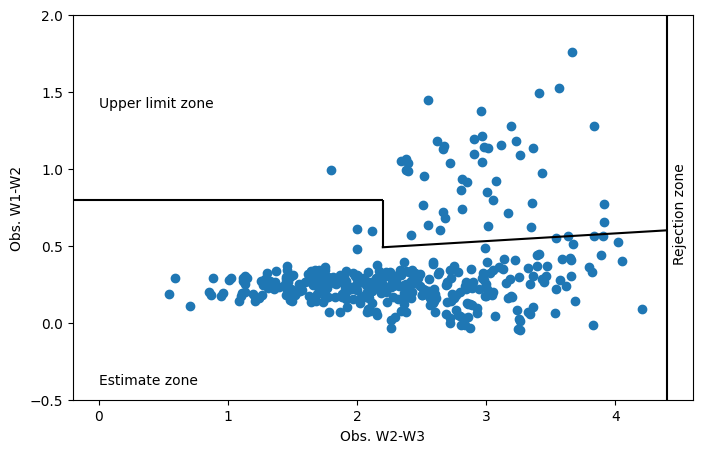

In [34]:
plt.figure(figsize=(8,5))

plt.hlines(y=0.8, xmin=-0.2, xmax=2.2, color='k')
plt.plot([2.2,4.4],[wm.w1w2_treshold_qso(2.2),wm.w1w2_treshold_qso(4.4)], color='k')
plt.vlines(x=2.2, ymin=wm.w1w2_treshold_qso(2.2), ymax=0.8, color='k')
plt.vlines(x=4.4, ymin=-0.5, ymax=2, color='k')

plt.text(0,-0.4,'Estimate zone')
plt.text(0,1.4,'Upper limit zone')
plt.text(4.45,0.4,'Rejection zone', rotation=90)

plt.scatter(allwise['W2-W3_obs'], allwise['W1-W2_obs'])

plt.xlabel('Obs. W2-W3')
plt.ylabel('Obs. W1-W2')

plt.xlim(-0.2,4.6)
plt.margins(y=0)

# Estimating SFR from obs. W3 magnitude and W2-W3 color

In [11]:
sfr = wm.w3_to_SFR(w3,w2w3_obs,z[:,None],mc=True,n=mc_size)

try:
    ids_cont = np.where(object_condition | (color_condition_1 | color_condition_2))
    sfr_cont = wm.w3_to_SFR(w3[ids_cont],w2w3_obs[ids_cont],z[:,None][ids_cont],ulirgs=True,mc=True,n=mc_size)
    sfr[ids_cont] = sfr_cont
except:
    print('No contaminated sources found.')

allwise['logSFR'] = np.median(sfr, axis=1)          #16, 50 and 84 percentile values saved for final SFR
allwise['low_logSFR'], allwise['high_logSFR'] = np.percentile(sfr, [16,84], axis=1)
allwise['SFR_Alert'] = 1*(object_condition | color_condition_1 | color_condition_2)
allwise['SFR_Alert'] = np.where((allwise['Z']>0.5),2,allwise['SFR_Alert'])

1.083413544505718 1.3564881293976985 1.6411333917234252


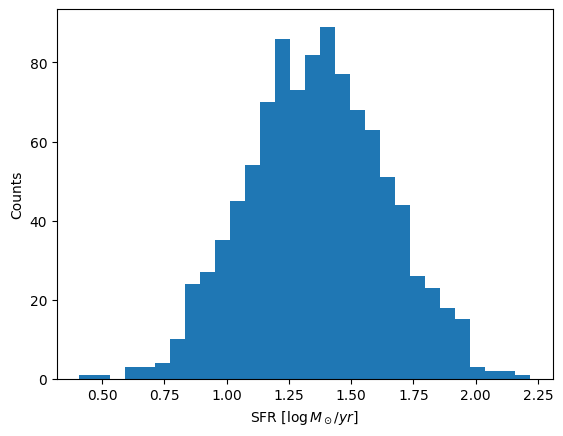

In [12]:
plt.hist(sfr[0],bins=30)

plt.xlabel(r'SFR [$\log M_\odot/yr$]')
plt.ylabel('Counts')

nominal = np.median(sfr[0])
sigma_down = np.percentile(sfr[0],16)
sigma_top = np.percentile(sfr[0],84)

print(sigma_down, nominal, sigma_top)

# K-corrections for the defined sample


Now we import the look-up tables from Jarrett+2023 to use

In [14]:
e_table = wm.kcorr_table('E')
l_table = wm.kcorr_table('L')
s_table = wm.kcorr_table('S')

In [15]:
e_table

,z,f1,W1-W2,W1-W3,W3-W4,W2-W3
0,0.00050,1.000,-0.000,-0.000,-0.000,-0.000
1,0.00100,1.000,0.000,0.001,0.000,0.001
2,0.00150,0.998,0.002,0.001,0.001,-0.001
3,0.00200,0.995,0.000,0.000,0.001,0.000
4,0.00250,0.995,0.005,0.002,0.002,-0.003
...,...,...,...,...,...,...
827,2.87603,0.043,0.930,1.733,-0.180,0.803
828,2.90479,0.043,0.941,1.758,-0.180,0.817
829,2.93384,0.043,0.952,1.783,-0.181,0.831
830,2.96318,0.043,0.963,1.808,-0.182,0.845


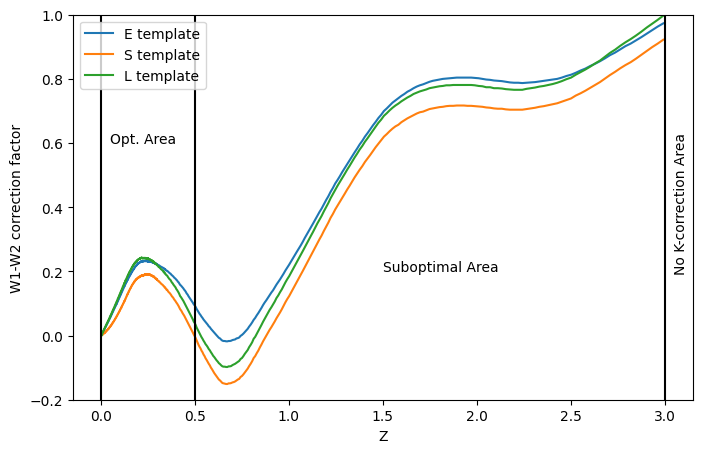

In [35]:
plt.figure(figsize=(8,5))

plt.plot(e_table['z'], e_table['W1-W2'], label='E template')
plt.plot(s_table['z'], s_table['W1-W2'], label='S template')
plt.plot(l_table['z'], l_table['W1-W2'], label='L template')

plt.vlines(x=0, ymin=-0.2, ymax=1, color='k')
plt.vlines(x=0.5, ymin=-0.2, ymax=1, color='k')
plt.vlines(x=3, ymin=-0.2, ymax=1, color='k')

plt.text(0.05, 0.6,'Opt. Area')
plt.text(1.5,0.2,'Suboptimal Area')
plt.text(3.05,0.2,'No K-correction Area', rotation=90)

plt.xlabel('Z')
plt.ylabel('W1-W2 correction factor')

plt.legend()
plt.margins(y=0)

In [17]:
allwise['K_QUALITY'] = 0
allwise['K_QUALITY'] = np.where(suboptimal_cond, 1, allwise['K_QUALITY'])
allwise['K_QUALITY'] = np.where(nok_cond, 2, allwise['K_QUALITY'])

factor_w2 = 171.787
factor_w3 = 31.674

w2w3_limit = -2.5*(np.log10(factor_w3/factor_w2) + 0.1)                             #Last value is the flux limit from Mateos et al. (2012)

identifier = np.random.choice(np.arange(10), size=3, replace=False)
for idn, sample, cond in zip(identifier,[optimal_sample, suboptimal_sample, nok_sample], [optimal_cond,suboptimal_cond,nok_cond]):
    if len(sample)!=0:
        if idn!=identifier[2]:                                                                      #Color k-correction for sample with z<0.5
            object_condition = (sample['NED_TYPE']=='RadioS') | (sample['NED_TYPE']=='QSO')

            e_index = np.where((sample['T']<=-3) & ~object_condition)[0]
            l_index = np.where((sample['T']>-3) & (sample['T']<=0) & ~object_condition)[0]          #Divide samples in Elliptical, Lenticular and Spiral by T value
            s_index = np.where((sample['T']>0) & (sample['T']!=no_data) & ~object_condition)[0]

            no_type_index = np.where((sample['T']==no_data) & ~object_condition)[0]                 #Sample without T values
            w1w2_no_type = sample[no_type_index]['W1-W2_obs']                                      
            w2w3_no_type = sample[no_type_index]['W2-W3_obs']  
            z_no_type = sample[no_type_index]['Z']                                                    

            e_f1_kcorrected = wm.get_correction_factor(lookup_table=e_table, redshift=sample[e_index]['Z'], correction_factor='f1')
            l_f1_kcorrected = wm.get_correction_factor(lookup_table=l_table, redshift=sample[l_index]['Z'], correction_factor='f1')   #W1 k-corrected 
            s_f1_kcorrected = wm.get_correction_factor(lookup_table=s_table, redshift=sample[s_index]['Z'], correction_factor='f1')

            e_w2w3_kcor = wm.get_correction_factor(lookup_table=e_table, redshift=sample[e_index]['Z'], correction_factor='W2-W3')
            l_w2w3_kcor = wm.get_correction_factor(lookup_table=l_table, redshift=sample[l_index]['Z'], correction_factor='W2-W3')     #W2-W3 k-correction factor
            s_w2w3_kcor = wm.get_correction_factor(lookup_table=s_table, redshift=sample[s_index]['Z'], correction_factor='W2-W3')

            e_w1w2_kcor = wm.get_correction_factor(lookup_table=e_table, redshift=sample[e_index]['Z'], correction_factor='W1-W2')
            l_w1w2_kcor = wm.get_correction_factor(lookup_table=l_table, redshift=sample[l_index]['Z'], correction_factor='W1-W2')     #W1-W2 k-correction factor
            s_w1w2_kcor = wm.get_correction_factor(lookup_table=s_table, redshift=sample[s_index]['Z'], correction_factor='W1-W2')

            no_type_w1w2_kcor = [
                wm.get_correction_factor(lookup_table=e_table, redshift=z, correction_factor='W1-W2') if (color_x<=w2w3_limit)
                else wm.get_correction_factor(lookup_table=s_table, redshift=z, correction_factor='W1-W2') if (color_x>w2w3_limit) else 0
                for color_x,color_y,z in zip(w2w3_no_type,w1w2_no_type, z_no_type)
                ]
            no_type_w2w3_kcor = [
                wm.get_correction_factor(lookup_table=e_table, redshift=z, correction_factor='W2-W3') if (color_x<=w2w3_limit)
                else wm.get_correction_factor(lookup_table=s_table, redshift=z, correction_factor='W2-W3') if (color_x>w2w3_limit) else 0
                for color_x,color_y,z in zip(w2w3_no_type,w1w2_no_type, z_no_type)
                ]

            no_type_f1_kcor = [
                wm.get_correction_factor(lookup_table=e_table, redshift=z, correction_factor='f1') if (color_x<=w2w3_limit)
                else wm.get_correction_factor(lookup_table=s_table, redshift=z, correction_factor='f1') if (color_x>w2w3_limit) else 1
                for color_x,color_y,z in zip(w2w3_no_type,w1w2_no_type, z_no_type)
                ]

            w1w2_kcors[np.where(cond)[0][e_index]] = e_w1w2_kcor
            w1w2_kcors[np.where(cond)[0][l_index]] = l_w1w2_kcor                   #W1-W2 k-correctrion factors filled
            w1w2_kcors[np.where(cond)[0][s_index]] = s_w1w2_kcor
            w1w2_kcors[np.where(cond)[0][no_type_index]] = no_type_w1w2_kcor

            w2w3_kcors[np.where(cond)[0][e_index]] = e_w2w3_kcor
            w2w3_kcors[np.where(cond)[0][l_index]] = l_w2w3_kcor                   #W2-W3 k-correctrion factors filled
            w2w3_kcors[np.where(cond)[0][s_index]] = s_w2w3_kcor
            w2w3_kcors[np.where(cond)[0][no_type_index]] = no_type_w2w3_kcor

            f1complete[np.where(cond)[0][e_index]] = e_f1_kcorrected
            f1complete[np.where(cond)[0][l_index]] = l_f1_kcorrected                 #W1abs k-corrected filled
            f1complete[np.where(cond)[0][s_index]] = s_f1_kcorrected
            f1complete[np.where(cond)[0][no_type_index]] = no_type_f1_kcor
            
        else:
            w1w2_kcors[np.where(cond)[0]] = 0
            w2w3_kcors[np.where(cond)[0]] = 0                                   #For sources with z>3, no k-correction is applied
            f1complete[np.where(cond)[0]] = 1
    else:
        continue

w1w2_kcorrected = w1w2_obs - w1w2_kcors[:,None]                                 #Colors for complete slice are applied
w2w3_kcorrected = w2w3_obs - w2w3_kcors[:,None]

w1_flux = 309.540 * (10**(-w1/2.5))

w1_flux_k_corrected = w1_flux*f1complete[:,None]

w1_ab_mag = -2.5*np.log10(w1_flux_k_corrected) + 8.926
w1_vega_mag_k_corrected = w1_ab_mag-2.699

w1abs = w1_vega_mag_k_corrected - wm.distance_modulus_z(z)[:,None]

allwise['W1-W2_kcor_f'] = w1w2_kcors
allwise['W2-W3_kcor_f'] = w2w3_kcors

allwise['W1-W2_kcor'] = np.median(w1w2_kcorrected, axis=1)                      #Median value is saved in data frame
allwise['W2-W3_kcor'] = np.median(w2w3_kcorrected, axis=1)

With all colors stored before/after K-correctio, is pretty easy to see the differences.

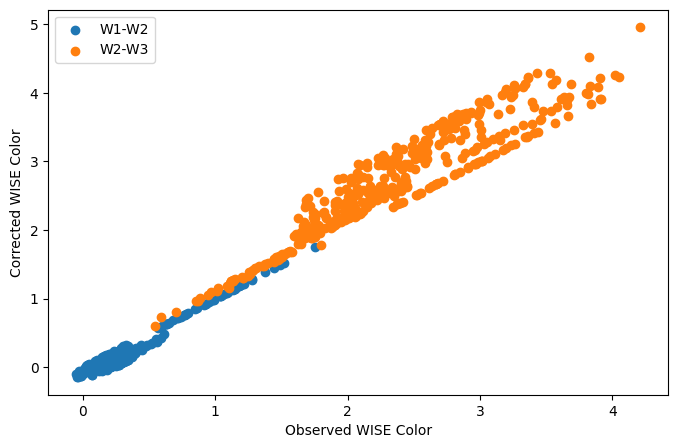

In [18]:
plt.figure(figsize=(8,5))

plt.scatter(allwise['W1-W2_obs'], allwise['W1-W2_kcor'], label='W1-W2')
plt.scatter(allwise['W2-W3_obs'], allwise['W2-W3_kcor'], label='W2-W3')

plt.xlabel('Observed WISE Color')
plt.ylabel('Corrected WISE Color')

plt.legend()

In [ ]:
w1w2_sat_top = wm.clipping_dist(w1w2_kcorrected, 0.6)                           #W1-W2 is saturated between -0.2 and 0.6 for M/L ratios
w1w2_sat_complete = wm.clipping_dist(w1w2_sat_top, -0.2, greater_than=False)

allwise['W1_abs'] = np.median(w1abs, axis=1)
allwise['W1-W2_clipped'] = np.median(w1w2_sat_complete, axis=1)

log_sm = wm.wise_to_logsm(w1abs, w1w2_sat_complete)

allwise['prior_logSM'] = np.median(log_sm, axis=1)

log_sm_res = wm.wise_to_logsm(w1abs, w1w2_sat_complete, resolved=True)          #log of Stellar mass is calculated and its median is saved

allwise['prior_logSMres'] = np.median(log_sm_res, axis=1)

log_sm[np.where(((allwise['ex']==b'5') | (allwise['ex']==b'4')) & (allwise['W2-W3_kcor']<w2w3_limit))[0]] = log_sm_res[np.where(((allwise['ex']==b'5') | (allwise['ex']==b'4')) & (allwise['W2-W3_kcor']<w2w3_limit))[0]]

allwise['logSM'] = np.median(log_sm, axis=1)

low_sm = 6.5            
high_sm = 13                                                                    #Limit values in log stellar and masking
                                                                                
log_sm_mask = (allwise['logSM']>=low_sm) & (allwise['logSM']<=high_sm)

log_sm = np.delete(log_sm, np.where(~log_sm_mask)[0], axis=0)       #logsm and w2w3 gaussian arrays are masked by the limits
w2w3_kcorrected = np.delete(w2w3_kcorrected, np.where(~log_sm_mask)[0], axis=0)
allwise = allwise[log_sm_mask]                                                      #data frame is masked

This same exact function is part of WISE2MBH package and here is the intended behavior of it:

11.388935597810596 11.591972351784268 11.806079781660909


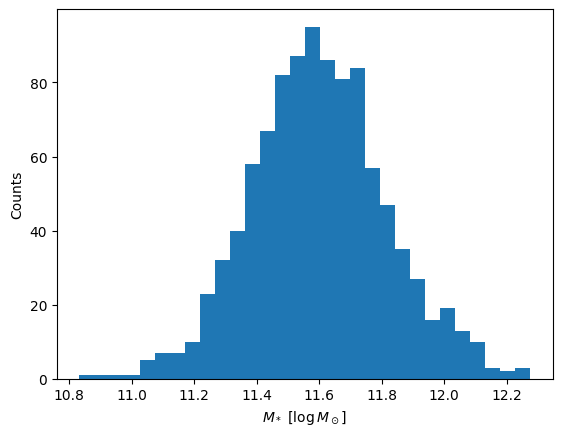

In [20]:
plt.hist(log_sm[0],bins=30)

plt.xlabel(r'$M_*$ [$\log M_\odot$]')
plt.ylabel('Counts')

nominal = np.median(log_sm[0])
sigma_down = np.percentile(log_sm[0],16)
sigma_top = np.percentile(log_sm[0],84)

print(sigma_down, nominal, sigma_top)

# Estimate and Upper limit zone for classification of objects 

This was shown previously, but now it is done with the K-corrected colors.

In [ ]:
object_condition = (allwise['NED_TYPE']==b'RadioS') | (allwise['NED_TYPE']==b'QSO')
color_condition_1 = (allwise['W1-W2_kcor']>0.8) & (allwise['W2-W3_kcor']<2.2)
color_condition_2 = (allwise['W1-W2_kcor']>wm.w1w2_treshold_qso(allwise['W2-W3_kcor'])) & (allwise['W2-W3_kcor']>=2.2) & (allwise['W2-W3_kcor']<=4.4)

allwise_estim_cond = ~(object_condition | color_condition_1 | color_condition_2)
allwise_uplim_cond = object_condition | color_condition_1 | color_condition_2

# AGN compensation

This is just an empirical compensation to AGN/QSO to account for extra flux from them (contamination), so we apply a factor to the total mass estimated for them.

In [ ]:
w1w2_for_agn = allwise['W1-W2_obs']
w1w2_for_agn[w1w2_for_agn>1.2] = 1.2
w1w2_for_agn[w1w2_for_agn<0.5] = 0.5

agn_frac_dirty = wm.agn_fraction(w1w2_for_agn)
agn_frac_ready = np.where(allwise_estim_cond, 1, agn_frac_dirty)

allwise['AGN_FRACTION'] = agn_frac_ready

# Morph. Type (T-Type) estimation using W2-W3 color

For objects previously classified as real estimates, a T-Type is needed to calculate the B/T, and that value sis not present or not usable in some cases, so we need to estimate it.

In [37]:
cond_change_t = (allwise_estim_cond) & ((allwise['T']==no_data) | (allwise['T']>8) | (allwise['T']<-5))     #Condition to change morphological value
w2w3_to_use = w2w3_kcorrected[np.where(cond_change_t)[0]]                                                                   #w2w3 is masked once again, now for noQSO that require a new T
new_t_value = wm.w2w3_to_morph(w2w3_to_use)                                                                                 #new T values are calculated using S-shape curve

t_value_dist = wm.array_montecarlo(allwise['T'], np.zeros(len(allwise['T'])), n=mc_size)  #Gaussians of every T value
t_value_dist[cond_change_t] = new_t_value

allwise['T_USED'] = -99                                                                                                  #T values selected are changed
allwise['T_USED'] = np.where(allwise_estim_cond, np.median(t_value_dist, axis=1), allwise['T_USED'])

allwise['T_QUALITY'] = 0
allwise['T_QUALITY'] = np.where(cond_change_t, 1, allwise['T_QUALITY'])
allwise['T_QUALITY'] = np.where(allwise_uplim_cond, 2, allwise['T_QUALITY'])

In some cases, a real T is used, so no distribution is created, but for others, an estimate is calculated, so now you can visualize that distribution (change `id_test` so find one!)

2.5234305801240335 2.6269323259771284 2.730650161023189


Text(0, 0.5, 'Counts')

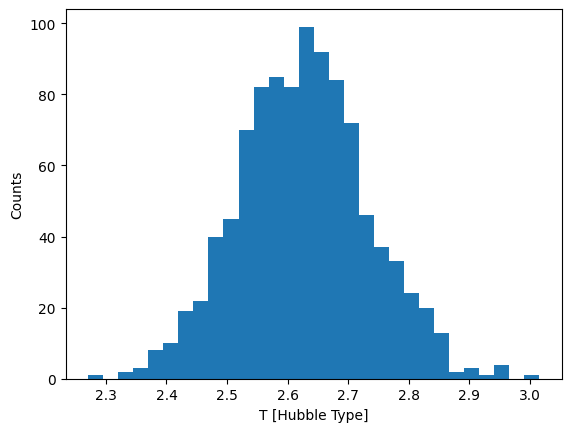

In [41]:
id_test = 1

plt.hist(t_value_dist[id_test],bins=30)

nominal = np.median(t_value_dist[id_test])
sigma_down = np.percentile(t_value_dist[id_test],16)
sigma_top = np.percentile(t_value_dist[id_test],84)

print(sigma_down, nominal, sigma_top)

plt.xlabel(r'T [Hubble Type]')
plt.ylabel('Counts')

# BT from T-Type using exponential relation, applying it and also AGN fraction

In [43]:
allwise['BT'] = no_data
allwise['BT'] = np.where(allwise_uplim_cond,1, allwise['BT'])

bulge_frac = wm.morph_to_bulge_ratio(t_value_dist)                                               #Bulge fractions are calculated for noQSO using the T value
allwise['BT'] = np.where(allwise_estim_cond, np.median(bulge_frac, axis=1), allwise['BT'])

bf_all = wm.array_montecarlo(np.ones(len(allwise)), np.zeros(len(allwise)), n=mc_size)    #Bulge ratios are overwritten and its median is saved
bf_all[allwise_estim_cond] = bulge_frac[allwise_estim_cond]

log_bm = np.log10(bf_all) + log_sm                                  #Bulge mass is calculated with Stellar mass
log_sm_agn_cleaned = np.log10(allwise['AGN_FRACTION'])[:,None] + log_bm

0.26022746939592134 0.2645454175147147 0.2689434544095143


Text(0, 0.5, 'Counts')

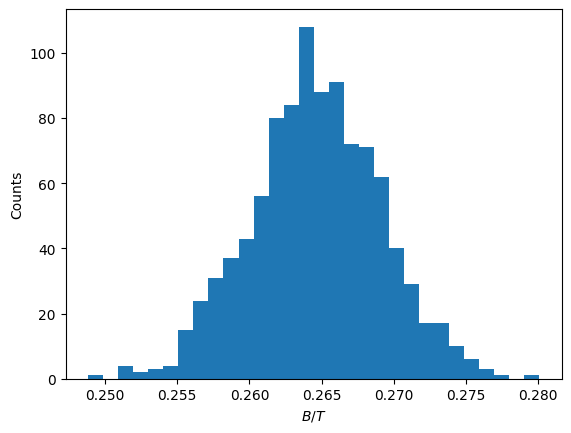

In [46]:
plt.hist(bulge_frac[id_test],bins=30)

nominal = np.median(bulge_frac[id_test])
sigma_down = np.percentile(bulge_frac[id_test],16)
sigma_top = np.percentile(bulge_frac[id_test],84)

print(sigma_down, nominal, sigma_top)

plt.xlabel(r'$B/T$')
plt.ylabel('Counts')

10.723766816225824 10.838608613537177 10.93444443407549


Text(0, 0.5, 'Counts')

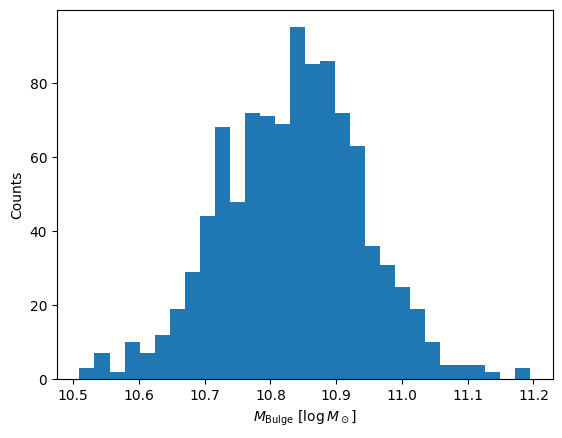

In [49]:
plt.hist(log_bm[id_test],bins=30)

nominal = np.median(log_bm[id_test])
sigma_down = np.percentile(log_bm[id_test],16)
sigma_top = np.percentile(log_bm[id_test],84)

print(sigma_down, nominal, sigma_top)

plt.xlabel(r'$M_{\rm Bulge}$ [$\log M_\odot$]')
plt.ylabel('Counts')

In [50]:
log_mbh = wm.bulge_to_mbh(log_bm,mc=True,n=mc_size)
log_mbh_cleaned = wm.bulge_to_mbh(log_sm_agn_cleaned,mc=True,n=mc_size)

comp_mbh = wm.comp_mbh(log_mbh)                                      #Empiriclly ompensated MBH
comp_mbh_cleaned = wm.comp_mbh(log_mbh_cleaned)

allwise['logMBH'] = np.median(comp_mbh, axis=1)          #16, 50 and 84 percentile values saved for final MBH
allwise['low_logMBH'], allwise['high_logMBH'] = np.percentile(comp_mbh_cleaned, [16,84], axis=1)

allwise['logMBH_AGN_Cleaned'] = np.median(comp_mbh, axis=1)          #16, 50 and 84 percentile values saved for final MBH
allwise['low_logMBH_AGN_Cleaned'], allwise['high_logMBH_AGN_Cleaned'] = np.percentile(comp_mbh_cleaned, [16,84], axis=1)

In [60]:
np.where(allwise['AGN_FRACTION']!=1)

(array([ 23,  44,  52,  55,  74,  79,  89, 119, 141, 148, 149, 164, 166,
        177, 180, 183, 187, 195, 200, 228, 229, 244, 245, 247, 249, 250,
        255, 261, 262, 263, 276, 279, 282, 283, 287, 293, 294, 306, 321,
        337, 344, 348, 352, 356, 359, 369, 377, 389]),)

In some cases, depending if the source is AGN contaminated or not, there may be a difference between the regular MBH estimate or the cleaned one (change the id to search!)

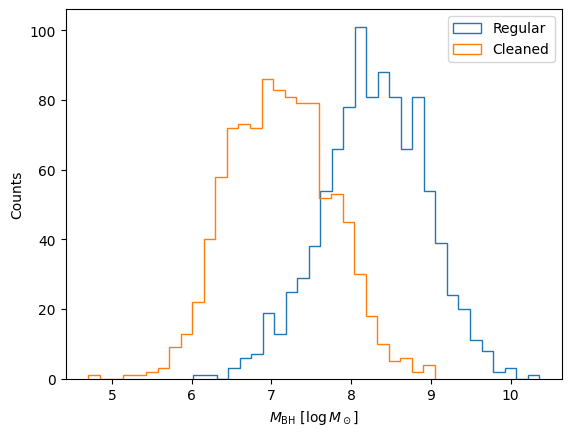

In [63]:
id_test = 23

plt.hist(comp_mbh[id_test],bins=30, histtype='step', label='Regular')
plt.hist(comp_mbh_cleaned[id_test],bins=30, histtype='step', label='Cleaned')

plt.xlabel(r'$M_{\rm BH}$ [$\log M_\odot$]')
plt.ylabel('Counts')

plt.legend()

Now all values of compensated MBHs are stored in the new_allwise table

In [64]:
allwise['MBHWISEUPLIM'] = 0
allwise['MBHWISEUPLIM'] = np.where(allwise_uplim_cond, 1, allwise['MBHWISEUPLIM'])

allwise['MBHWISEUPLIM'] = 0
allwise['MBHWISEUPLIM'] = np.where(allwise_uplim_cond, 1, allwise['MBHWISEUPLIM'])
phot_info = [x[:-1] for x in allwise['qph']]
ex_info = allwise['ex']                             #Photometric quality, extention flag and uplim are combined in one string
mbh_info = allwise['MBHWISEUPLIM'].astype(str)
k_quality = allwise['K_QUALITY'].astype(str)
t_quality = allwise['T_QUALITY'].astype(str)

quality_flag = []
for i in np.arange(len(phot_info)):
    str_info = phot_info[i] + ex_info[i] + mbh_info[i] + k_quality[i] + t_quality[i]
    quality_flag.append(str_info)

allwise['QF'] = quality_flag 

mbh_non_outliers = allwise['logMBH']>=5
non_reject_sources = allwise['W2-W3_kcor']<=4.4

final_allwise = allwise[mbh_non_outliers & non_reject_sources]

size_after_algorithm = len(allwise)

cols = ['W1-W2_obs','W2-W3_obs','logSFR','low_logSFR','high_logSFR','SFR_Alert','K_QUALITY','W1-W2_kcor_f','W2-W3_kcor_f','W1-W2_kcor','W2-W3_kcor','W1_abs','W1-W2_clipped','prior_logSM','prior_logSMres','logSM','BT','AGN_FRACTION','T_USED','T_QUALITY','logMBH','low_logMBH','high_logMBH', 'logMBH_AGN_Cleaned', 'low_logMBH_AGN_Cleaned', 'high_logMBH_AGN_Cleaned' ,'MBHWISEUPLIM','QF']

for col in cols:
    input_sample[col] = (np.ones(len(input_sample))*no_data).astype(allwise[col].dtype)

input_sample.loc[final_allwise['INTERNAL_ID']] = final_allwise

In [65]:
input_sample  = input_sample[(input_sample['logMBH']!=no_data) & (input_sample['logMBH']>=5)]
input_sample

ONAME,RA,DEC,Z,T,NED_TYPE,AllWISE,RAJ2000,DEJ2000,eeMaj,eeMin,eePA,W1mag,W2mag,W3mag,W4mag,Jmag,Hmag,Kmag,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag,e_Hmag,e_Kmag,ID,ccf,ex,var,qph,pmRA,e_pmRA,pmDE,e_pmDE,d2M,angDist,INTERNAL_ID,W1-W2_obs,W2-W3_obs,logSFR,low_logSFR,high_logSFR,SFR_Alert,K_QUALITY,W1-W2_kcor_f,W2-W3_kcor_f,W1-W2_kcor,W2-W3_kcor,W1_abs,W1-W2_clipped,prior_logSM,prior_logSMres,logSM,BT,AGN_FRACTION,T_USED,T_QUALITY,logMBH,low_logMBH,high_logMBH,logMBH_AGN_Cleaned,low_logMBH_AGN_Cleaned,high_logMBH_AGN_Cleaned,MBHWISEUPLIM,QF
bytes107,float64,float64,float64,float64,bytes7,bytes19,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes4,bytes1,bytes4,bytes4,int32,int32,int32,int32,float32,float64,int64,float32,float32,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float64,int64,float64,float64,float64,float64,float64,float64,int64,str7
WISEAJ095302.06+655715.6,148.2585967,65.9543472,0.5,9876543.0,Unknown,J095302.06+655715.6,148.2585967,65.9543472,0.0497,0.0485,15.8,14.67,13.395,9.558,6.602,--,--,--,0.028,0.028,0.037,0.06,--,--,--,1484166601351005300,0000,0,0011,AAAA,192,80,22,87,--,6.5e-05,298,1.2,3.8370008,3.2051210205389298,0.7441165858973858,5.570317349496739,1,2,0.0,0.0,1.2753434316397012,3.8388128439338125,-27.655399012995318,0.5953434316397006,11.171673007251389,10.68580134095318,11.171673007251389,0.09941287338733673,-99.0,2.0,1,9.095921857608213,7.28496365548735,8.55175328970856,9.095921857608213,7.28496365548735,8.55175328970856,1,AAA0122
WISEAJ054319.41-493705.8,85.830884,-49.6182888,0.5,9876543.0,Unknown,J054319.41-493705.8,85.830884,-49.6182888,0.0468,0.0459,119.0,14.156,13.519,10.967,9.557,16.597,15.984,14.819,0.025,0.026,0.071,0.524,0.151,0.16,0.111,859050001351044007,0000,0,000n,AAAC,78,81,-28,86,0.297,7.2e-05,367,0.6370001,2.552,2.4295568991407333,0.03807994715283234,4.715502034494299,1,2,0.0,0.0,0.6376607213228977,2.545915635418158,-28.17090069522471,0.5976607213228977,11.371524930035404,10.885663427282697,11.371524930035404,0.17092373967170715,-99.0,2.0,1,9.333498103936224,7.783298772326321,9.019743278433582,9.333498103936224,7.783298772326321,9.019743278433582,1,AAA0122
WISEAJ185413.90-663757.9,283.5579291,-66.6327519,0.3,9876543.0,Unknown,J185413.90-663757.9,283.5579292,-66.6327519,0.0466,0.0452,122.8,13.77,12.839,10.024,7.816,16.247,15.699,14.782,0.026,0.025,0.057,0.171,0.13,0.179,0.125,2820066701351027339,0000,0,000n,AAAB,-74,98,-294,99,0.641,0.000105,780,0.9310007,2.8149996,2.218215511320646,-0.19266125594236674,4.52291578291652,1,2,0.0,0.0,0.9272536101860105,2.8178150946699363,-27.25461187022458,0.5972536101860102,11.005868547446443,10.519591345347823,11.005868547446443,0.12807299196720123,-99.0,2.0,1,8.90804968272726,7.2190202190960315,8.485223392324402,8.90804968272726,7.2190202190960315,8.485223392324402,1,AAA0122
WISEAJ214521.61-564034.9,326.3400429,-56.6763645,0.3,9876543.0,Unknown,J214521.61-564034.9,326.3400429,-56.6763645,0.0823,0.0738,154.0,15.148,13.968,10.733,7.076,--,--,--,0.038,0.041,0.104,0.132,--,--,--,3253056101351000169,0000,0,nnnn,AAAB,-291,319,370,350,--,0.000117,894,1.1799994,3.2350006,1.7990523480578435,-0.5761765598955998,4.068978899167167,1,2,0.0,0.0,1.182098073798139,3.2331697573797937,-25.876544894168802,0.5920980737981385,10.465324646478464,9.981792517797421,10.465324646478464,0.10131073743104935,-99.0,2.0,1,8.310773785815373,6.527293630100894,7.7970879621959694,8.310773785815373,6.527293630100894,7.7970879621959694,1,AAA0122
WISEAJ005158.46+051121.2,12.9935904,5.1892391,0.2,9876543.0,Unknown,J005158.46+051121.2,12.9935904,5.1892391,0.0919,0.0854,143.0,15.341,13.896,11.349,8.379,--,--,--,0.044,0.04,0.215,0.38,--,--,--,136104501351063248,0000,0,00nn,AABC,-74,314,-148,326,--,0.000171,1283,1.2,2.547,0.9991624090958448,0.7138990696000035,1.2977034702994499,1,2,0.0,0.0,1.446954011645964,2.54

And this is the final table after the complete process of the WISE2MBH algorithm, using only AllWISE+ETHER data.

In [ ]:
#final_allwise.write('enter_your_route_here.fits')